NOMBRE: 



Suponemos que el conjunto de datos se genera a partir de diferentes distribuciones multivariantes gaussianas.

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Plots
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(-1, 3, 10)
normcolor = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
##########
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import norm

Primero fijamos los valores medios y las matrices de covarianza correspondientes a cada clase, así como sus etiquetas. Actualmente se seleccionan tres valores medios para el conjunto de datos.

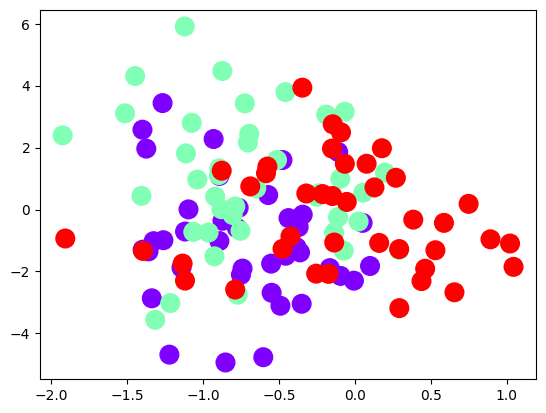

In [2]:
# Ambient dimension
p=2
# Number of elements in each class
n1=40 
n2=40
n3=40
#### Labels
color=np.concatenate((0*np.ones(n1,),1*np.ones(n2,),2*np.ones(n3,)),
                     axis=0)[np.newaxis]
#### Mean values
# Either random
m1=norm.rvs(0,1,size=(p,))
m2=norm.rvs(0,1,size=(p,))
m3=norm.rvs(0,1,size=(p,))
# Or fixed
#m1= [1,2]
#m2=[-2,-1]
#m3=[-2,3]
#### Covariance matrix
temp= norm.rvs(0, 0.5, size=(p, p))
Sigma1 =  temp.T@temp
Sigma2 = Sigma1
Sigma3 = Sigma1
#### Generate data
X1=mvnorm.rvs(m1, Sigma1, size=(n1, 1))
X2=mvnorm.rvs(m2, Sigma2, size=(n2, 1))
X3=mvnorm.rvs(m3, Sigma3, size=(n3, 1))
#### Build the dataset
X=np.concatenate((X1,X2,X3),axis=0)
Xlabeled=np.concatenate((X,color.T),axis=1)
xbar1=np.mean(X1,0)
xbar2=np.mean(X2,0)
xbar3=np.mean(X3,0)
xmean1=(xbar1+xbar2)/2
xmean2=(xbar1+xbar3)/2
xmean3=(xbar2+xbar3)/2
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=180, c=color, cmap=plt.cm.rainbow)
plt.show()



Ahora los datos están listos para su procesamiento posterior.

Primero preparamos el conjunto de datos.

In [3]:
X12=np.concatenate((X1,X2),axis=0)
y12=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]



Antes de continuar, Use la siguiente matriz $\mathbf E_n$ para simplificar todo el proceso.

In [4]:
#### Centering Matrix
def centering(n):
    return np.eye(n)-np.ones((n,n))/n


Obtenga la función LDA de Fisher

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Inicializa el objeto LDA
lda = LDA()

# Ajusta el modelo LDA a tus datos (X, y)
lda.fit(X, color[0])

# Obtiene los coeficientes de la función discriminante de Fisher
coef = lda.coef_

print("Coeficientes de la función discriminante de Fisher: ", coef)

Coeficientes de la función discriminante de Fisher:  [[-0.84324021 -0.26737103]
 [-0.53719984  0.25765081]
 [ 1.38044005  0.00972022]]


Implementación de la función análisis de discriminante


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def lda_analysis(X, y):
    # Crea una instancia de LDA
    lda = LinearDiscriminantAnalysis()

    # Ajusta el modelo LDA a los datos
    lda.fit(X, y)

    # Transforma los datos
    X_lda = lda.transform(X)

    return X_lda, lda

# Uso de la función
X_lda, lda_model = lda_analysis(X, color[0])

Obtenga resultado, agregue un gráfico y comente


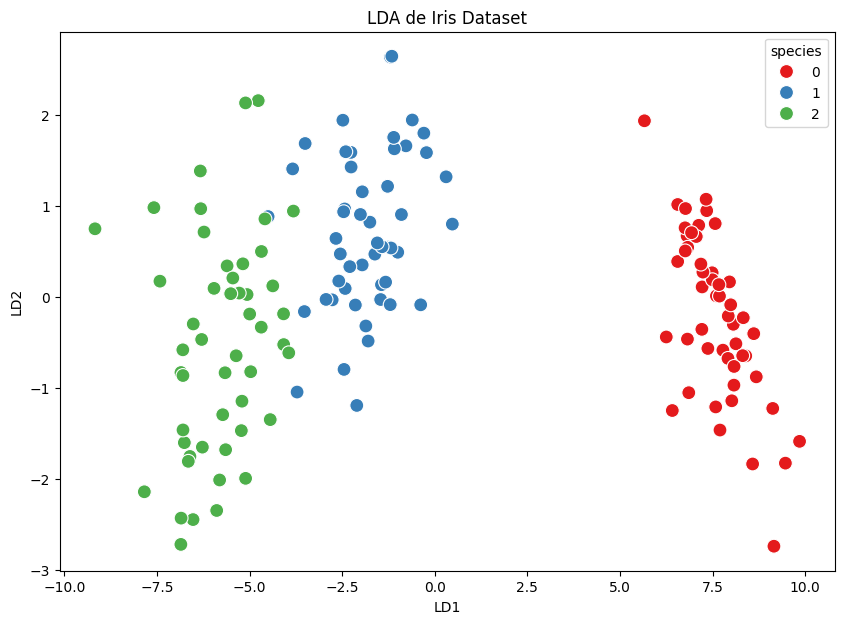

In [10]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el conjunto de datos de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Realiza el análisis LDA
X_lda, lda_model = lda_analysis(X, y)

# Crea un DataFrame para facilitar la trama
df = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
df["species"] = iris.target

# Crea el gráfico
plt.figure(figsize=(10, 7))
sns.scatterplot(x="LD1", y="LD2", hue="species", data=df, palette="Set1", s=100)

plt.title('LDA de Iris Dataset')
plt.show()

## K-Means 

1.	Reanalice su datos y obtenga 2 y 3 cluster.
2.	Concluya lo obtenido y grafique lo pedido en 1.

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ajusta el modelo KMeans a los datos para 2 clusters
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X)

# Ajusta el modelo KMeans a los datos para 3 clusters
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)



KMeans(n_clusters=3)

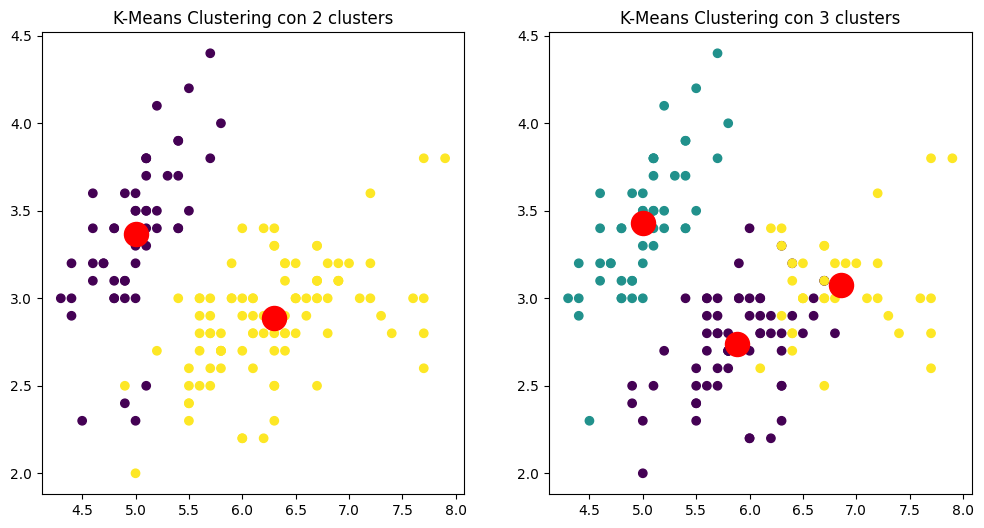

In [12]:
# Crea los gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X[:, 0], X[:, 1], c=kmeans2.labels_, cmap='viridis')
ax[0].scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red')
ax[0].set_title('K-Means Clustering con 2 clusters')

ax[1].scatter(X[:, 0], X[:, 1], c=kmeans3.labels_, cmap='viridis')
ax[1].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=300, c='red')
ax[1].set_title('K-Means Clustering con 3 clusters')

plt.show()